## Data Description 
This dataset contains information about food delivery orders processed through the DoorDash platform, offering a glimpse into the customer interactions within a delivery platform. It tracks orders from when they are placed to when they are delivered. The dataset helps identify peak hours during the day when orders are most frequent and highlights the most popular product categories.


## Columns Description
1. `market_id` : A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id
2. `created_at` : Timestamp in UTC when the order was submitted by the consumer to DoorDash. (Timestamp in UTC)
3. `actual_delivery_time` : Timestamp in UTC when the order was delivered to the consumer
4. `store_primary_category` : cuisine category of the restaurant, e.g., italian, asian
5. `total_items`: total number of items in the order
6. `subtotal` : total value of the order submitted (in cents)
7. `min_item_price` : price of the item with the least cost in the order (in cents)
8. `max_item_price` : price of the item with the highest cost in the order (in cents)
9. `total_onshift_dashers` : Number of available dashers who are within 10 miles of the store at the time of order creation
10. `total_busy_dashers` : Subset of above total_onshift_dashers who are currently working on an order
11. `total_outstanding_orders` : Number of orders within 10 miles of this order that are currently being processed.

## Performing Data Wrangling and Data Cleaning
* Removing the null values and duplicates
* Changing the Data types
* Renaming and addding the columns
* Organizing the data for Analysis

In [190]:
# Necessary libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
# reading the csv file
dd = pd.read_csv("doordash_data.csv")

In [140]:
# total rows and columns 
dd.shape

(197421, 13)

In [142]:
# counting the null
dd.isnull().sum()

market_id                       1
created_at                      0
actual_delivery_time            1
store_primary_category          1
total_items                     1
subtotal                        1
min_item_price                  1
max_item_price                  1
total_onshift_dashers       16262
total_busy_dashers          16262
total_outstanding_orders    16262
promo_item                      1
promo_order                     1
dtype: int64

In [144]:
# removing the null value from entire dataframe
dd.dropna(inplace=True)

In [146]:
# Filtering the data , removing the unkown from store_primary category
dd = dd[dd["store_primary_category"] != "unknown"]

In [148]:
# Renaming the column to order placed time
dd = dd.rename(columns={"created_at": "order_placed_time"})

In [150]:
# Changing the values from cents to dollor 
def cents_to_dollars(cents):
    return cents / 100

dd["subtotal"] = dd["subtotal"].apply(cents_to_dollars)
dd["min_item_price"] = dd["min_item_price"].apply(cents_to_dollars)
dd["max_item_price"] = dd["max_item_price"].apply(cents_to_dollars)


In [172]:
dd["market_id"] = dd["market_id"].astype("int64")

In [154]:
# Changing datatype to datetime
dd['order_placed_time'] = pd.to_datetime(dd['order_placed_time'])
dd['actual_delivery_time'] =  pd.to_datetime(dd['actual_delivery_time'])

In [156]:
# Extracting only the time order placed
dd['order_placed_time'] = dd['order_placed_time'].dt.strftime('%Y-%m-%d %H:%M:%S')
dd['actual_delivery_time'] = dd['actual_delivery_time'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [157]:
# Converting back to date time
dd['order_placed_time'] = pd.to_datetime(dd['order_placed_time'])
dd['actual_delivery_time'] =  pd.to_datetime(dd['actual_delivery_time'])

In [158]:
# Adding up the column delivery time taken for the order
dd["delivery_time"] = dd["actual_delivery_time"] - dd["order_placed_time"]

In [159]:
# placing it next to actual delivery 
dd.insert(3, 'delivery_time', dd.pop('delivery_time'))

In [160]:
# Extract onlyt the time
dd['delivery_time'] = dd['delivery_time'].astype('str').str[-8:]

In [179]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176944 entries, 0 to 197419
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 176944 non-null  int64         
 1   order_placed_time         176944 non-null  datetime64[ns]
 2   actual_delivery_time      176944 non-null  datetime64[ns]
 3   delivery_time             176944 non-null  object        
 4   store_primary_category    176944 non-null  object        
 5   total_items               176944 non-null  float64       
 6   subtotal                  176944 non-null  float64       
 7   min_item_price            176944 non-null  float64       
 8   max_item_price            176944 non-null  float64       
 9   total_onshift_dashers     176944 non-null  float64       
 10  total_busy_dashers        176944 non-null  float64       
 11  total_outstanding_orders  176944 non-null  float64       
 12  promo_i

In [200]:
dd["market_id"] = dd["market_id"].replace({99: 6})

In [181]:
dd.head(3)

,market_id,order_placed_time,actual_delivery_time,delivery_time,store_primary_category,total_items,subtotal,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,promo_item,promo_order
0,1,2015-01-21 07:22:03,2015-01-21 08:17:43,00:55:40,dessert,2.0,10.58,2.19,7.99,2.0,1.0,1.0,0.0,0.0
1,3,2015-01-21 07:31:51,2015-01-21 08:16:34,00:44:43,cafe,2.0,6.90,1.95,2.55,2.0,0.0,1.0,0.0,0.0
3,1,2015-01-21 07:40:42,2015-01-21 08:22:37,00:41:55,cafe,3.0,9.55,2.45,3.45,3.0,2.0,2.0,0.0,0.0


## Operation Performed
- Changed the values from **cents to dollar**
- Add column `delivery_time` 
- Changed Datatypes
- Removed Null values
- Filtered the dataset , remove the unknown from store_primary_category 	

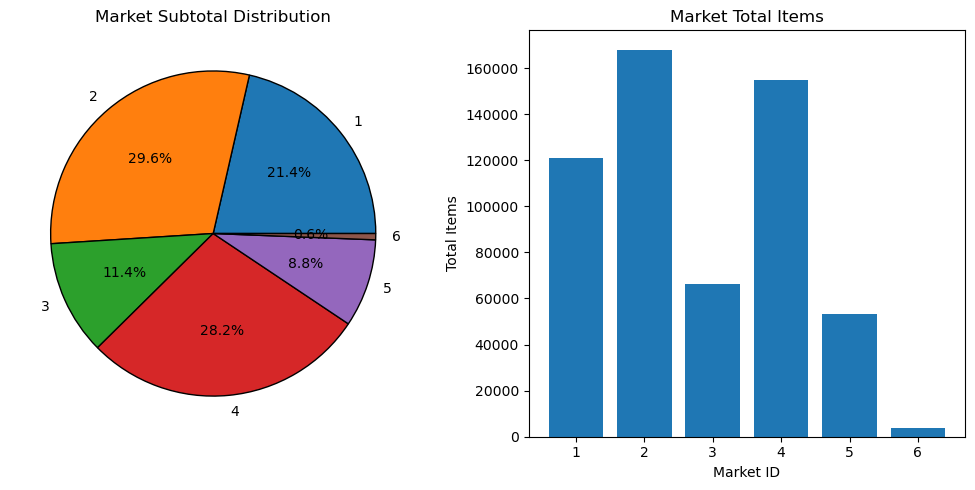

In [210]:

# Creating a figure 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for market subtotal distribution with labels
market_subtotal = dd.groupby("market_id")["subtotal"].sum()
axes[0].pie(market_subtotal, autopct='%1.1f%%', wedgeprops={"edgecolor": "black"}, labels=market_subtotal.index)
axes[0].set_title("Market Subtotal Distribution")

# Bar chart for total items per market
market_subtotal_items = dd.groupby("market_id")["total_items"].sum()
axes[1].bar(market_subtotal_items.index, market_subtotal_items.values)
axes[1].set_title("Market Total Items")
axes[1].set_xlabel('Market ID')
axes[1].set_ylabel('Total Items')

plt.tight_layout()


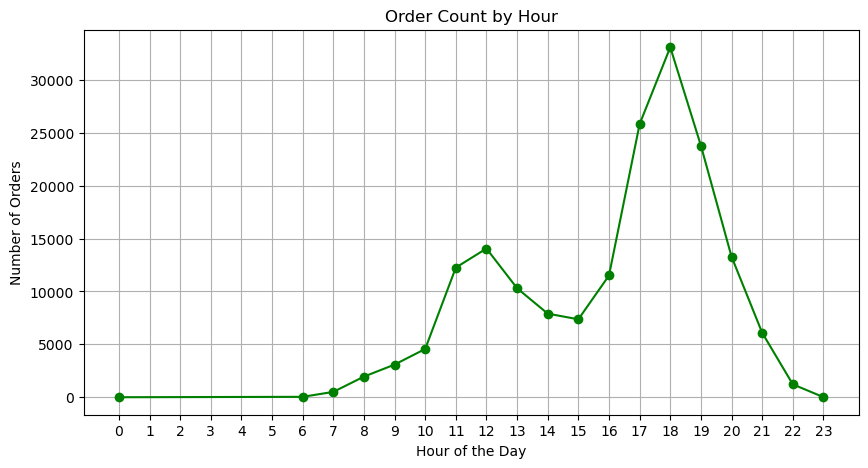

In [222]:
dd['hour'] = dd['order_placed_time'].dt.hour

# Count of orders placed in each hour
order_count_by_hour = dd['hour'].value_counts().sort_index(ascending=True)

#  line chart figure
plt.figure(figsize=(10, 5))
plt.plot(order_count_by_hour.index, order_count_by_hour.values, marker='o', linestyle='-', color='green')

# Necessary Titles
plt.title("Order Count by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.xticks(range(0, 24))  
plt.show()

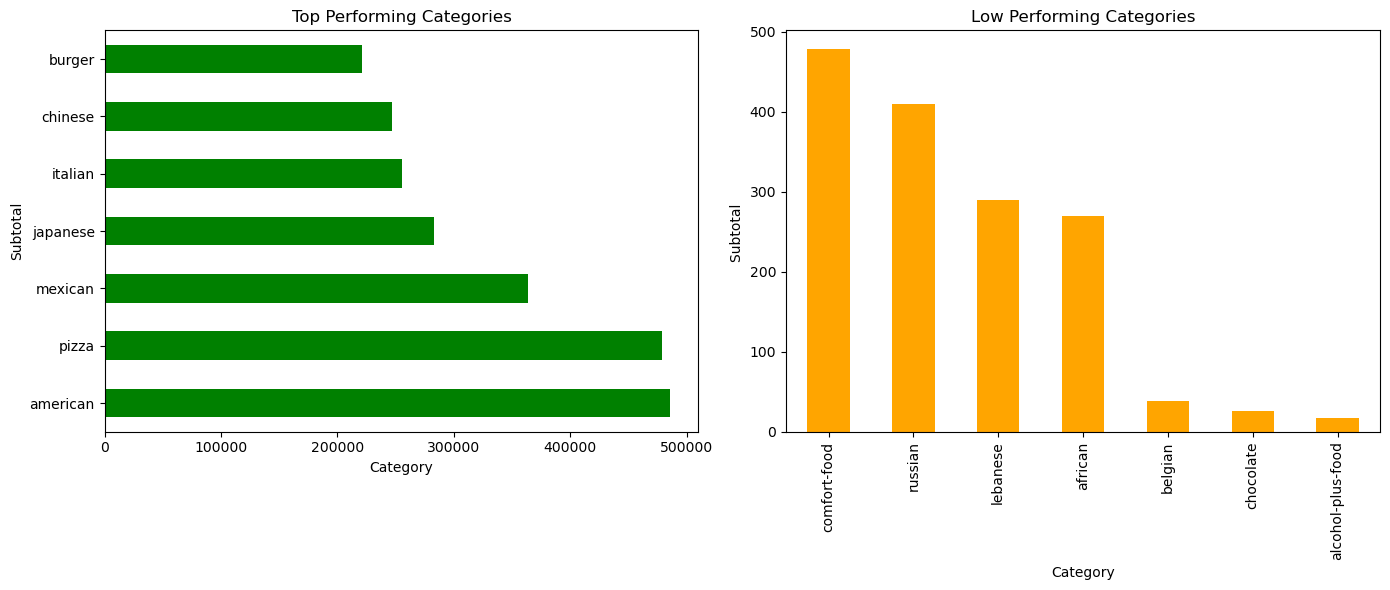

In [228]:

# Get the top 7 performing categories based on subtotal
top_categories = dd.groupby("store_primary_category")["subtotal"].sum().sort_values(ascending=False).head(7)

# Get the bottom 7 performing categories based on subtotal
low_categories = dd.groupby("store_primary_category")["subtotal"].sum().sort_values(ascending=False).tail(7)

# Create subplots: One for the top categories (vertical bar), one for the low categories (vertical bar)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot top categories (vertical bar chart)
top_categories.plot(kind="barh", ax=ax[0], color='green')
ax[0].set_title("Top Performing Categories")
ax[0].set_xlabel("Category")
ax[0].set_ylabel("Subtotal")

# Plot low categories (vertical bar chart)
low_categories.plot(kind="bar", ax=ax[1], color='orange')
ax[1].set_title("Low Performing Categories")
ax[1].set_xlabel("Category")
ax[1].set_ylabel("Subtotal ")

# Display the plot
plt.tight_layout()


In [295]:
# creating a summary table 
summary_table = dd.groupby("store_primary_category").agg(
    avg_delivery_time=('delivery_time', 'mean'),
    total_orders=('order_placed_time', 'size'),
    total_subtotal=('subtotal', 'sum')
).reset_index()

# Display the summarized table
summary_table.set_index("store_primary_category",inplace=True)
summary_table.head(6)

,avg_delivery_time,total_orders,total_subtotal
store_primary_category,,,
afghan,0 days 00:52:13.442307692,104,3073.94
african,0 days 00:50:48.600000,10,269.97
alcohol,0 days 00:45:11.083096186,1757,46471.36
alcohol-plus-food,0 days 00:50:46,1,16.99
american,0 days 00:47:52.190621925,18298,485874.26
argentine,0 days 00:49:30.943661971,71,3035.63


## Conclusion 
Q. Which market type contributed most to the `total`?<br>
Ans. Based on the analysis, `Market 2` contributed the most, exceeding the combined contributions of Markets 3, 5, and 6.

Q. What are the peak hours when orders are received? <br>
Ans. The highest number of orders are received between 5 PM and 9 PM in a 24-hour period.

Q. Which product categories contribute the most to the total order count and subtotal? <br>
Ans. `American` and `Pizza` categories are the most in demand, contributing significantly to both total order counts and subtotal.

Q. What is the average delivery time based on the category?<br>
Ans. The summary table provides an overview of the average delivery time for each category, along with order counts and total values.